<a href="https://colab.research.google.com/github/salmaelbarbori/Data-Science-For-Beginners/blob/main/Population_Growth_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📅 Welcome in the **second session** in **Data/AI Cell** part of CODE ESI.

In today's workshop, we will dicover three mandatory libraries built on python programming language, that provides us with the ability to **turn our data into insight**.
What are those Libraries? Mainly we are going to tackle:
- **Numpy**: a library for mathematical operations.
- **Pandas**: a library for data manipulation.
- **Matplotlib**: a library for data visualization.

Let's start our learning by:
- **building our skills** (Presentation).
- Building **our first Data Science Project**. So we can put into practice the knowledeg acquired suring this session.

Our project name is : **Population Growth Rate in different Countries**

Let's start by ***importing our libraries***

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [69]:
#Reading Our Dataset
data_frame = pd.read_csv('/content/drive/MyDrive/CODE_ESI_DATA_AI_CELL/Session2/countries.csv')

In [70]:
#Observing our dataset
data_frame.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [71]:
#Getting to know what our dataset, thatw as csv file. is now?
type(data_frame)

pandas.core.frame.DataFrame

In [72]:
#How many rows, and columns do we have in our dataset?
data_frame.shape

(1704, 3)

In [73]:
#Let the magic begin, I want to compare the population in two years, 1952, and 2007. and see theri growth.
#For that, i'll extract the infos I have in those years, with 'loc[]'.

countries_1952 = data_frame.loc[data_frame['year'] == 1952]
countries_2007 = data_frame.loc[data_frame['year'] == 2007]


In [74]:
#I do have 142 line in both, and 3 colomns in both
countries_1952.shape
countries_2007.shape

(142, 3)

In [75]:
#In order for me to see them side by side i'll use(Merge). there is merge is I want them to be horizonal, and there is concat if i want them to be vertically.
population_growth = countries_1952.merge(countries_2007, left_on='country', right_on='country')

In [76]:
population_growth.head()

,country,year_x,population_x,year_y,population_y
0,Afghanistan,1952,8425333,2007,31889923
1,Albania,1952,1282697,2007,3600523
2,Algeria,1952,9279525,2007,33333216
3,Angola,1952,4232095,2007,12420476
4,Argentina,1952,17876956,2007,40301927


In [77]:
#Droping the years, and renaming the population column, to make it refer to the population in a specific year
population_growth = population_growth.drop(['year_x', 'year_y'],axis = 1)

In [78]:
#Here, I am renaming my olumns, so they make sense from first read.
population_growth = population_growth.rename(
    columns = {
        'population_x': 'population_1952',
        'population_y': 'population_2007'
    }
)

In [79]:
population_growth.head(3)

,country,population_1952,population_2007
0,Afghanistan,8425333,31889923
1,Albania,1282697,3600523
2,Algeria,9279525,33333216


In [80]:
#Now, it is time for us to observe the difference between the too population, which means the growth!
#we will create a new column that has the difference of populations, then observe it.
population_growth['pop_growth'] = population_growth['population_2007'] - population_growth['population_1952']

In [81]:
population_growth.head()

,country,population_1952,population_2007,pop_growth
0,Afghanistan,8425333,31889923,23464590
1,Albania,1282697,3600523,2317826
2,Algeria,9279525,33333216,24053691
3,Angola,4232095,12420476,8188381
4,Argentina,17876956,40301927,22424971


In [82]:
#Let's visualize this difference

In [83]:
population_growth.reset_index

<bound method DataFrame.reset_index of                 country  population_1952  population_2007  pop_growth
0           Afghanistan          8425333         31889923    23464590
1               Albania          1282697          3600523     2317826
2               Algeria          9279525         33333216    24053691
3                Angola          4232095         12420476     8188381
4             Argentina         17876956         40301927    22424971
..                  ...              ...              ...         ...
137             Vietnam         26246839         85262356    59015517
138  West Bank and Gaza          1030585          4018332     2987747
139         Yemen, Rep.          4963829         22211743    17247914
140              Zambia          2672000         11746035     9074035
141            Zimbabwe          3080907         12311143     9230236

[142 rows x 4 columns]>

In [84]:
population_growth.head()

,country,population_1952,population_2007,pop_growth
0,Afghanistan,8425333,31889923,23464590
1,Albania,1282697,3600523,2317826
2,Algeria,9279525,33333216,24053691
3,Angola,4232095,12420476,8188381
4,Argentina,17876956,40301927,22424971


In [85]:
population_growth= population_growth.sort_values("pop_growth", ascending = False)

In [86]:
population_growth.head()

,country,population_1952,population_2007,pop_growth
24,China,556263527,1318683096,762419569
58,India,372000000,1110396331,738396331
134,United States,157553000,301139947,143586947
59,Indonesia,82052000,223547000,141495000
14,Brazil,56602560,190010647,133408087


In [87]:
population_growth = population_growth.reset_index()

In [88]:
population_growth = population_growth.drop(['index'], axis = 1)

In [89]:
population_growth.head(10)

,country,population_1952,population_2007,pop_growth
0,China,556263527,1318683096,762419569
1,India,372000000,1110396331,738396331
2,United States,157553000,301139947,143586947
3,Indonesia,82052000,223547000,141495000
4,Brazil,56602560,190010647,133408087
5,Pakistan,41346560,169270617,127924057
6,Bangladesh,46886859,150448339,103561480
7,Nigeria,33119096,135031164,101912068
8,Mexico,30144317,108700891,78556574
9,Philippines,22438691,91077287,68638596


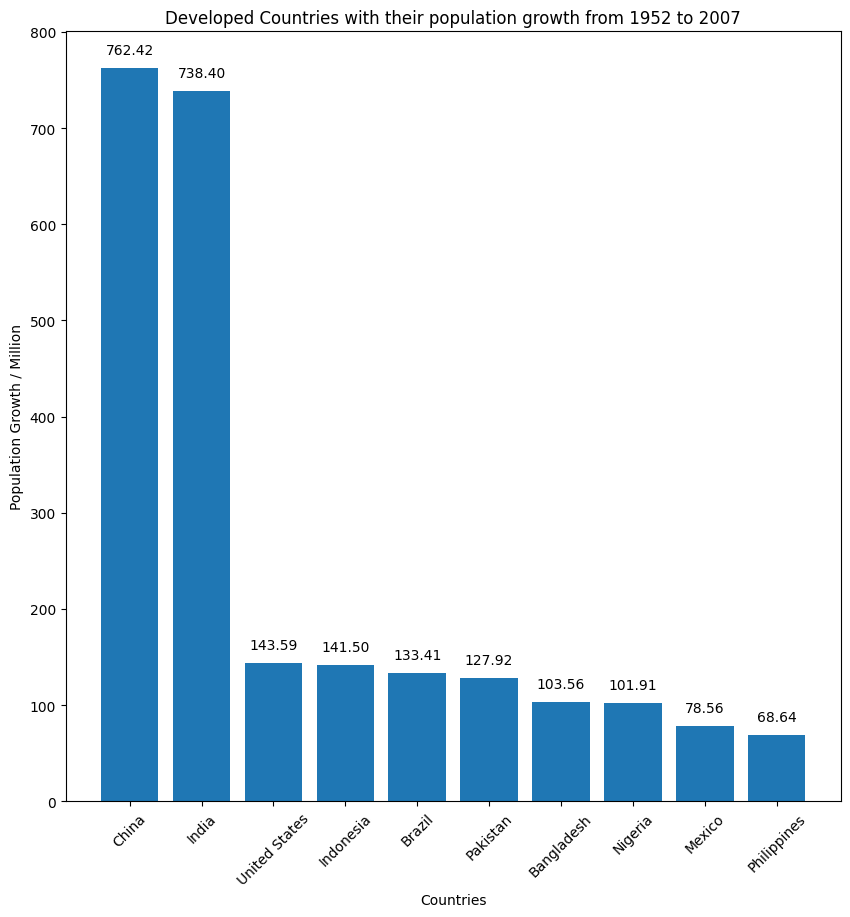

In [100]:
plt.figure(figsize=(10, 10))
top_countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil','Pakistan', 'Bangladesh', 'Nigeria', 'Mexico', 'Philippines']
pop_grow = population_growth[population_growth['country'].isin(top_countries)]['pop_growth'] / 10**6

plt.bar(top_countries, pop_grow)
plt.title('Developed Countries with their population growth from 1952 to 2007')
plt.xlabel('Countries')
plt.ylabel('Population Growth / Million')
plt.xticks(rotation=45)
for x, y in zip(top_countries, pop_grow):
  label = '{:0.2f}'.format(y)
  plt.annotate(label, (x, y), textcoords='offset points', xytext=(0,10), ha='center')

plt.show()



In [101]:
#Interpretation

*Congratulations! you made it to the end of the project, you can now add it as the first project in your github account.*